## CLEANING DATA

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/luwate/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/luwate/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [468]:
#Read the data 
df=pd.read_csv('Apple-Twitter-Sentiment-DFE.csv', encoding='latin1')

In [469]:
df['sentiment'].value_counts(
)

sentiment
3               2162
1               1219
5                423
not_relevant      82
Name: count, dtype: int64

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [471]:
df.isna().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

In [472]:
df.drop(columns=['_last_judgment_at', 'sentiment_gold'],inplace=True)

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   sentiment             3886 non-null   object 
 5   sentiment:confidence  3886 non-null   float64
 6   date                  3886 non-null   object 
 7   id                    3886 non-null   float64
 8   query                 3886 non-null   object 
 9   text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 277.2+ KB


In [474]:
df_clean=df.copy()

In [475]:

def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+', '', text)
        # Remove mentions
        text = re.sub(r'@\w+', '', text)
        #text =  re.sub(r'@+', '', text)
        #text = re.sub(r'@\w+', '<MENTION>', text)
        # Remove hashtags
        text = re.sub(r'#\w+', '', text)
        #text = re.sub(r'#\w+', '<HASHTAG>', text)
        #text =  re.sub(r'#+', '', text)
        # Remove RT (retweet) indicator
        text = re.sub(r'^RT\s+', '', text)
        # Remove multiple spaces and strip
        text = re.sub(r'\s+', ' ', text)
        #lowercase text
        text = text.lower()
        #Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation.replace('<', '').replace('>', '')))
        text = text.strip()
    return text

In [476]:
# Apply cleaning to the 'text' column
df_clean['text'] = df_clean['text'].apply(clean_text)

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   sentiment             3886 non-null   object 
 5   sentiment:confidence  3886 non-null   float64
 6   date                  3886 non-null   object 
 7   id                    3886 non-null   float64
 8   query                 3886 non-null   object 
 9   text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 277.2+ KB


In [478]:
print(df.dtypes)

_unit_id                  int64
_golden                    bool
_unit_state              object
_trusted_judgments        int64
sentiment                object
sentiment:confidence    float64
date                     object
id                      float64
query                    object
text                     object
dtype: object


In [479]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [_unit_id, _golden, _unit_state, _trusted_judgments, sentiment, sentiment:confidence, date, id, query, text]
Index: []


In [480]:
print("Before cleaning:")
print(df['text'].head())
print("\
After cleaning:")
print(df_clean['text'].head())

Before cleaning:
0    #AAPL:The 10 best Steve Jobs emails ever...htt...
1    RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2    My cat only chews @apple cords. Such an #Apple...
3    I agree with @jimcramer that the #IndividualIn...
4         Nobody expects the Spanish Inquisition #AAPL
Name: text, dtype: object
After cleaning:
0                   the 10 best steve jobs emails ever
1      why aapl stock had a miniflash crash today aapl
2                      my cat only chews cords such an
3    i agree with that the should own not trade  it...
4               nobody expects the spanish inquisition
Name: text, dtype: object


In [481]:
df_clean['text'][2]

'my cat only chews cords such an'

In [482]:
df['text'][2]

'My cat only chews @apple cords. Such an #AppleSnob.'

Further Preprocessing

In [483]:
# Tokenization
tokenizer = RegexpTokenizer(r'<[A-Z]+>|[\w]+')
df_clean['text'] = df_clean['text'].apply(lambda x: tokenizer.tokenize(x))

In [484]:
df_clean['text'][0]

['the', '10', 'best', 'steve', 'jobs', 'emails', 'ever']

In [485]:
#Stopwords
important_words = {'not', 'no', 'never', 'very', 'should', 'could', 'would'}
stopwords_list = set(stopwords.words('english'))
stopwords_list = stopwords_list - important_words
df_clean['text'] = df_clean['text'].apply(lambda x: [word for word in x if word not in stopwords_list])

In [486]:
df_clean['text']

0                   [10, best, steve, jobs, emails, ever]
1            [aapl, stock, miniflash, crash, today, aapl]
2                                     [cat, chews, cords]
3       [agree, should, not, trade, extended, todays, ...
4                 [nobody, expects, spanish, inquisition]
                              ...                        
3881    [via, fc, apple, warming, social, media, apple...
3882                       [no, avocado, emoji, may, ask]
3883           [could, not, agree, great, things, happen]
3884    [iphone, 5s, photos, no, longer, downloading, ...
3885    [excited, named, app, store, best, 2014, list,...
Name: text, Length: 3886, dtype: object

In [487]:
#stemmer
#stemmer = PorterStemmer()
#df_clean['text'].apply(lambda x: [stemmer.stem(word) for word in x])
lemmatizer = WordNetLemmatizer()
df_clean['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

0                     [10, best, steve, job, email, ever]
1            [aapl, stock, miniflash, crash, today, aapl]
2                                       [cat, chew, cord]
3       [agree, should, not, trade, extended, today, p...
4                 [nobody, expects, spanish, inquisition]
                              ...                        
3881    [via, fc, apple, warming, social, medium, appl...
3882                       [no, avocado, emoji, may, ask]
3883            [could, not, agree, great, thing, happen]
3884    [iphone, 5, photo, no, longer, downloading, au...
3885    [excited, named, app, store, best, 2014, list,...
Name: text, Length: 3886, dtype: object

Vectorizer

In [488]:
df_clean['text'] = df_clean['text'].str.join(" ")

In [489]:
#Model 
analyser = SentimentIntensityAnalyzer()
analyser.polarity_scores(df_clean['text'][1])['compound']
df_clean['scores'] = df_clean['text'].apply(lambda x: analyser.polarity_scores(x)['compound'])

In [490]:
df_clean['sentiment'].value_counts()

sentiment
3               2162
1               1219
5                423
not_relevant      82
Name: count, dtype: int64

In [491]:
df_clean['scores']

0       0.6369
1      -0.4019
2       0.0000
3       0.6597
4      -0.2960
         ...  
3881    0.1531
3882   -0.2960
3883   -0.6602
3884    0.1280
3885    0.7650
Name: scores, Length: 3886, dtype: float64

In [492]:
df_clean

,_unit_id,_golden,_unit_state,_trusted_judgments,sentiment,sentiment:confidence,date,id,query,text,scores
0,623495513,True,golden,10,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,10 best steve jobs emails ever,0.6369
1,623495514,True,golden,12,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,aapl stock miniflash crash today aapl,-0.4019
2,623495515,True,golden,10,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,cat chews cords,0.0000
3,623495516,True,golden,17,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,agree should not trade extended todays pullbac...,0.6597
4,623495517,False,finalized,3,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,nobody expects spanish inquisition,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...
3881,623499442,True,golden,13,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,via fc apple warming social media apple hiring...,0.1531
3882,623499450,True,golden,16,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,no avocado emoji may ask,-0.2960
3883,623499486,True,golden,14,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,could not agree great things happen,-0.6602
3884,623499514,True,golden,13,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,iphone 5s photos no longer downloading automat...,0.1280


In [493]:
df['text'][3884]

"My iPhone 5's photos are no longer downloading automatically to my laptop when I sync it. @apple support is unhelpful. Any ideas?"

In [494]:
df_clean['text'][3884]

'iphone 5s photos no longer downloading automatically laptop sync support unhelpful ideas'

In [495]:
df_clean['positivity'] = df_clean['scores'].map(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')

In [496]:
df_clean['positivity'].value_counts()

positivity
neutral     1589
positive    1208
negative    1089
Name: count, dtype: int64

<Axes: xlabel='positivity'>

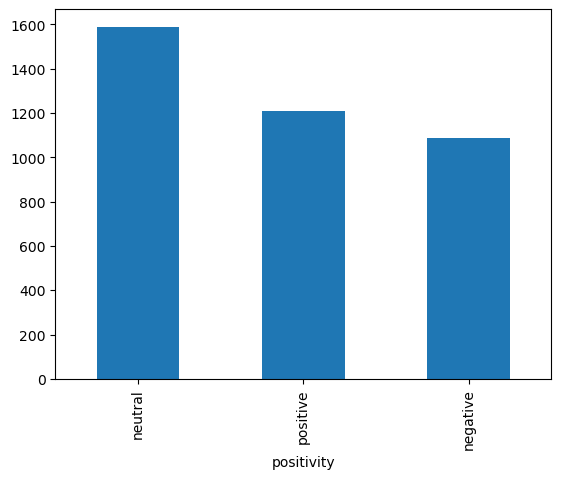

In [497]:
df_clean['positivity'].value_counts().plot.bar()

In [498]:
avg_pos = df_clean[df_clean['positivity'] == 'positive']['scores'].mean()
avg_neg = df_clean[df_clean['positivity'] == 'negative']['scores'].mean()
avg_score = df_clean['scores'].mean()

In [499]:
avg_score

0.006235795162120427

Kmeans attempt

In [506]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

kmeans = KMeans(3, random_state=42)
vectorizer = TfidfVectorizer(max_features=1000)

X = vectorizer.fit_transform(df_clean['text'])
clusters = kmeans.fit_predict(X)

df_clean['cluster'] = clusters



In [508]:
df_clean

,_unit_id,_golden,_unit_state,_trusted_judgments,sentiment,sentiment:confidence,date,id,query,text,scores,positivity,cluster
0,623495513,True,golden,10,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,10 best steve jobs emails ever,0.6369,positive,0
1,623495514,True,golden,12,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,aapl stock miniflash crash today aapl,-0.4019,negative,1
2,623495515,True,golden,10,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,cat chews cords,0.0000,neutral,0
3,623495516,True,golden,17,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,agree should not trade extended todays pullbac...,0.6597,positive,0
4,623495517,False,finalized,3,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,nobody expects spanish inquisition,-0.2960,negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,623499442,True,golden,13,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,via fc apple warming social media apple hiring...,0.1531,positive,1
3882,623499450,True,golden,16,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,no avocado emoji may ask,-0.2960,negative,0
3883,623499486,True,golden,14,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,could not agree great things happen,-0.6602,negative,0
3884,623499514,True,golden,13,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,iphone 5s photos no longer downloading automat...,0.1280,positive,0


In [507]:
df_clean['cluster'].value_counts()

cluster
0    2794
1     716
2     376
Name: count, dtype: int64

Conclusion: Kmeans does not work as well as VADER for sentiment analysis in this instance, likely because the tweets are too similar.